# Projection

In [1]:
from numpy import cos, sin

import matplotlib as mpl
import matplotlib.pyplot as plt
import numba as nb
import numpy as np

In [2]:
def projection(im, im_p):
    w, h = im.shape
    im_r = np.ones((w, h), dtype=np.float64)
    
    for x in range(w):
        for y in range(h):
            v = np.array([float(x), float(y), 1.0]).reshape((3, 1))
            _x1, _y1, _ = np.dot(im_p, v).flat
            
            x1 = int(_x1)
            y1 = int(_y1)
            
            if x1 < h and y1 < w and x1 >=0 and y1 >= 0:
                # rows = y, columns = x
                im_r[y1, x1] = im[y, x]
    return im_r

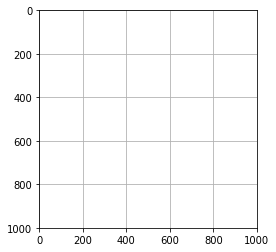

In [3]:
size = 1000
px = int(size//100)
settings = dict(cmap='gray', vmin=-1, vmax=1)
im = np.ones((size, size), dtype=float)

# cmap.set_bad('w',1.)
plt.imshow(im, **settings)
plt.grid(True)
plt.show()
plt.close()

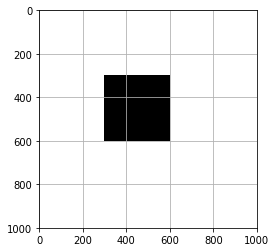

In [4]:
im[30*px:60*px, 30*px:60*px] = -1
plt.imshow(im, **settings)
plt.grid(True)
plt.show()
plt.close()

In [5]:
nb_proj = nb.jit(projection, nopython=True)

# Translation Projection

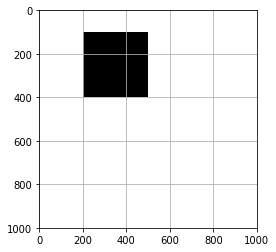

CPU times: user 2.83 s, sys: 320 ms, total: 3.15 s
Wall time: 3.54 s


In [6]:
%%time

tx = -10*px
ty = -20*px

im_p = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1],
], dtype=float)

im_r = nb_proj(im=im, im_p=im_p)

plt.imshow(im_r, **settings)
plt.grid(True)
plt.show()
plt.close()

# Rotate Projection

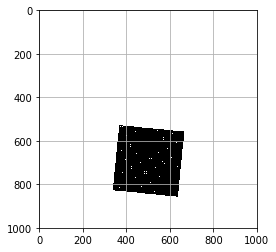

In [7]:
# %%time
tx = 10*px
ty = 20*px
θ = 0.1

im_p = np.array([
    [cos(θ), -sin(θ), tx],
    [sin(θ), cos(θ), ty],
    [0, 0, 1],
])

im_r = nb_proj(im=im, im_p=im_p)

plt.imshow(im_r, **settings)
plt.grid(True)
plt.show()
plt.close()